In [1]:

import pandas as pd
import numpy as np

x_train_n = pd.DataFrame({'fruit_label':[0,    1,    0,    1,    0,    1,    0,    1,    0,    1,    0,    1], 
                      'mass':       [154,  260,  148,  218,  150,  142,  148,  316,  148,  148,  152,  198],
                      'width':      [6.15, 7.55, 6.55, 7.05, 5.95, 5.97, 5.85, 8.52, 6.45, 6.08, 6.35, 6.87]}).values
y_train_n = pd.DataFrame({'color_score':[35,   46,   34,   46,   27,   52,   28,   49,   28,   60,   28,   64]}).values


x_val_n  = pd.DataFrame({'fruit_label':[0,    1,    0,    1,    0,    1,    0,    1,    0,    1,    0,    1], 
                      'mass':       [150,  120,  154,  148,  154,  196,  154,  164,  150,  142,  144,  262],
                      'width':      [6.15, 5.53, 6.65, 6.17, 7.15, 6.48, 6.35, 5.93, 5.75, 6.08, 5.70, 7.58]}).values
y_val_n = pd.DataFrame({'color_score':[24,   47,   31,   46,   42,   58,   27,   49,   19,   61,   26,   50]}).values


print('x_train_n',x_train_n.shape, 'x_val_n',x_val_n.shape, 'y_train_n',y_train_n.shape, 'y_val_n',y_val_n.shape)


x_train_n (12, 3) x_val_n (12, 3) y_train_n (12, 1) y_val_n (12, 1)


In [2]:
import random as rn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

class TrainTF():
    optimizer = None
    model = None

    def __init__(self, conf):
        tf.random.set_seed(conf['rs'])

        initial_learning_rate = 0.001
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate,
            decay_steps=50,#100000,
            decay_rate=0.96,
            staircase=True)
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        #tf.keras.backend.clear_session()
        #print('tf init done')
        return

    def compile(self, x_train_shape):
        data_in = keras.Input(shape=(x_train_shape[1],), name="img_in")
        dense_1 = layers.Dense(32, activation="relu")(data_in)
        data_out = layers.Dense(1, activation="linear")(dense_1)
        self.model = keras.Model(data_in, data_out)
        self.model.compile(optimizer=self.optimizer, loss='mse') # mae optimizer='adam'
        #print('tf define done')
        return

    def fit(self, conf, x_train, y_train, x_val, y_val):
        #tf.keras.backend.clear_session()
        history_callback = self.model.fit(x_train,y_train,
                  epochs=conf['epochs'],
                  batch_size=conf['bs'],
                  shuffle=False,
                  validation_data=(x_val, y_val),
                  callbacks=[keras.callbacks.EarlyStopping(patience=5)],
                  verbose=1,
                 )
        #print('tf fit done')
        return history_callback

    def predict(self, x):
        #print('tf predict done')
        return self.model.predict(x)

conf_i={'name': 'tf', 'tune': 'rs,epochs', 'rs': 2734, 'epochs': 5, 'bs': 1024}    
model = TrainTF(conf_i)
model.compile(x_train_n.shape)
history_callback = model.fit(conf_i, x_train_n, y_train_n, x_val_n, y_val_n)

loss_history = history_callback.history["loss"]
history_callback.history
y_train_pred_n = model.predict(x_train_n) 
# y_val_pred_n   = model.predict(x_val_n) 
# #y_test_pred_n  = model.predict(x_test_n) 
# y_test_pred_n  = None

#evaluate(y_train_pred_n, y_val_pred_n, y_test_pred_n, conf_i, submit=True)    
y_train_pred_n

Train on 12 samples, validate on 12 samples
Epoch 1/5
12/12 [==============================] - 6s 466ms/sample - loss: 5683.1030 - val_loss: 4798.5903
Epoch 2/5
12/12 [==============================] - 0s 7ms/sample - loss: 5544.1147 - val_loss: 4687.4468
Epoch 3/5
12/12 [==============================] - 0s 1ms/sample - loss: 5406.8970 - val_loss: 4577.6753
Epoch 4/5
12/12 [==============================] - 0s 1ms/sample - loss: 5271.4805 - val_loss: 4469.2983
Epoch 5/5
12/12 [==============================] - 0s 1ms/sample - loss: 5137.8950 - val_loss: 4362.3408


array([[-23.196072],
       [-38.81414 ],
       [-22.296211],
       [-32.4918  ],
       [-22.592876],
       [-21.05014 ],
       [-22.291273],
       [-47.24606 ],
       [-22.295507],
       [-21.953606],
       [-22.896591],
       [-29.48157 ]], dtype=float32)

In [5]:
y_train_pred_n.shape

(12, 1)

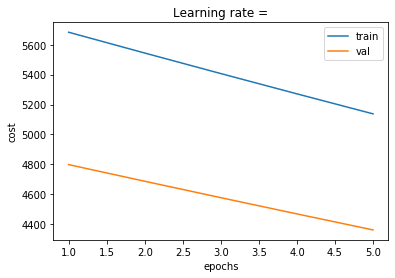

In [3]:
def plot_costs(ox, train_list, val_list):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.plot([x for x in range(1,conf_i['epochs']+1)], train_list); 
    plt.plot([x for x in range(1,conf_i['epochs']+1)], val_list); 
    plt.ylabel('cost'); 
    plt.xlabel('epochs'); 
    plt.title("Learning rate ="); 
    plt.legend(['train','val'])
    plt.show()  
plot_costs(ox=[x for x in range(1,conf_i['epochs']+1)], train_list=history_callback.history["loss"], val_list=history_callback.history["val_loss"])
